In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import the data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_2/datasets/crowdfunding-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   goal           1129 non-null   int64
 1   pledged        1129 non-null   int64
 2   backers_count  1129 non-null   int64
 3   country        1129 non-null   int64
 4   staff_pick     1129 non-null   int64
 5   spotlight      1129 non-null   int64
 6   category       1129 non-null   int64
 7   days_active    1129 non-null   int64
 8   outcome        1129 non-null   int64
dtypes: int64(9)
memory usage: 79.5 KB


In [2]:
# Create an X and y variable
X = df.drop(columns=['outcome'])
y = df['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
# Create a Random Forest model
classifier = RandomForestClassifier()

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

# Calculate the accuracy of the model on the testing data
classifier.score(X_test, y_test)

0.950530035335689

In [4]:
# Calculate the accuracy of the model on the training data
classifier.score(X_train, y_train)

1.0

In [5]:
# create a loop to vary the max_depth parameter
# and make sure to record the train and test scores 
# for each pass.

# the depths should span from 1 up to 15 in steps of 1
depths = range(1, 15)

# scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# need to loop through each depth
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# will need to set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

<Axes: xlabel='depth'>

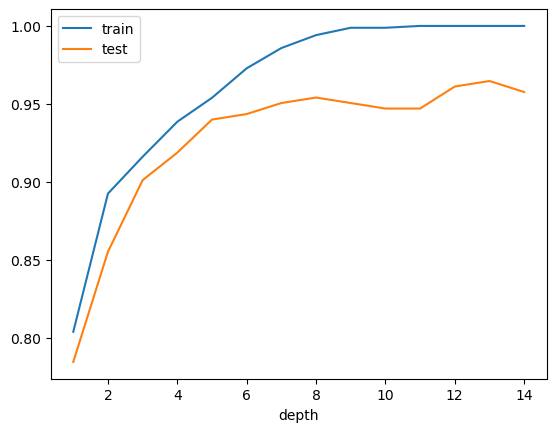

In [6]:
# Plot the scores dataframe with the plot method
scores_df.plot()